In [1]:
class Kmeans(object):
    def __init__(self, kParameter, data):
        self.__kParameter = kParameter
        self.__data = data
        
    def KmeansClustering(self):
        import numpy as np
        np.random.seed(0)
        numberOfSamples = len(self.__data)
        numberOfFeatures = self.__data.shape[1]
        centers = [np.random.randint(numberOfSamples) for i in range(self.__kParameter)]
        centers = self.__data[centers,:]
        
        centers_old = np.zeros(centers.shape) # to store old centers
        centers_new = centers # Store new centers

        clusters = np.zeros(numberOfSamples)
        distances = np.zeros((numberOfSamples,self.__kParameter))

        error = np.linalg.norm(centers_new - centers_old)

        # When, after an update, the estimate of that center stays the same, exit loop
        while error != 0:
            # Measure the distance to every center
            for i in range(self.__kParameter):
                distances[:,i] = np.linalg.norm(self.__data - centers[i], axis=1)
            # Assign all training data to closest center
            clusters = np.argmin(distances, axis = 1)

            centers_old = centers_new
            # Calculate mean for every cluster and update the center
            for i in range(self.__kParameter):
                centers_new[i] = np.mean(self.__data[clusters == i], axis=0)
            error = np.linalg.norm(centers_new - centers_old)
        return {"Clusters" : clusters, "Centers" : centers_new}

In [2]:
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target

In [3]:
obj = Kmeans(3,X)

In [4]:
res = obj.KmeansClustering()
centers = res["Centers"]
clusters = res["Clusters"]
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2], dtype=int64)

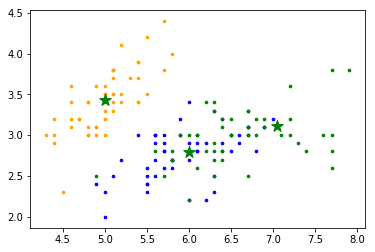

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
colors=['orange', 'blue', 'green']
for i in range(len(X)):
    plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(y[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)
plt.show()

In [6]:
for i in range(len(X)):
    if clusters[i] == 2:
        clusters[i] = 1
    elif clusters[i] == 1:
        clusters[i] = 2
    else:
        clusters[i] = 0
print("Accuracy of Clustering: %.3f" %(clusters == y).mean())

Accuracy of Clustering: 0.833
